In [25]:
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.charts import Geo
from pyecharts.render import make_snapshot
from snapshot_phantomjs import snapshot
from pyecharts.globals import ChartType
from pyecharts.faker import Collector, Faker
import random
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import pandas as pd
import imageio
from mpl_toolkits.mplot3d import Axes3D
import math
import numpy as np

## 作业8

### 调整顺序角度，并更改字体大小

<IPython.core.display.Javascript object>


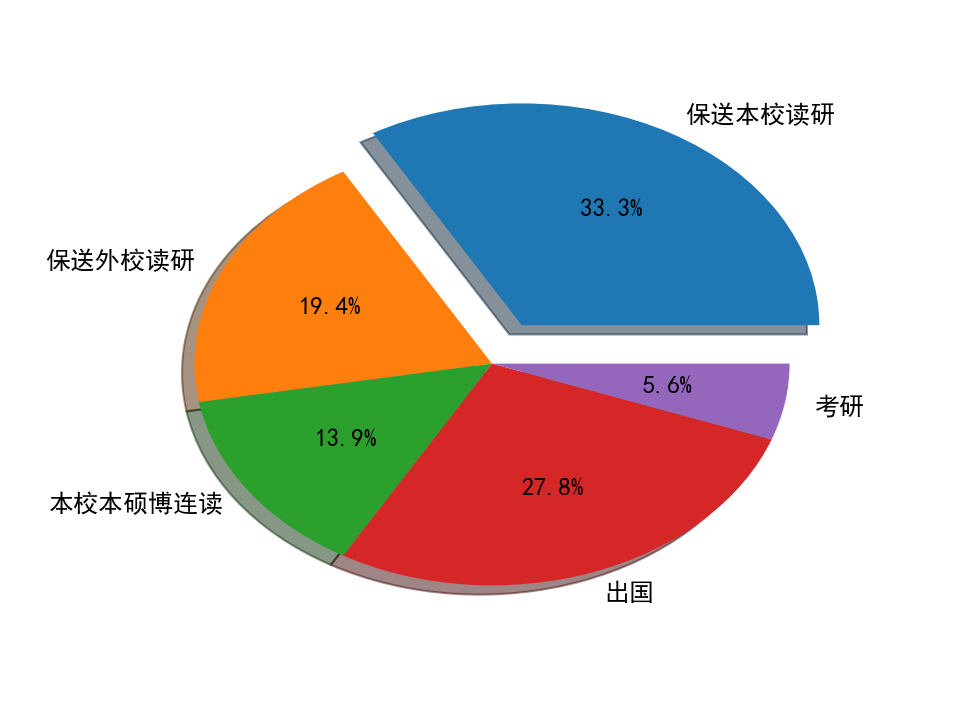

In [34]:
fig1 = plt.figure()
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
label_list = ['保送本校读研','保送外校读研', '本校本硕博连读', '出国', '考研']
size = [12, 7, 5, 10, 2]
explode = [0.2, 0, 0, 0, 0]
patches, texts, autotexts = plt.pie(size, explode = explode, labels = label_list, labeldistance = 1.1, autopct='%1.1f%%',shadow=True, startangle = 0, pctdistance = 0.6)
proptease = fm.FontProperties()
proptease.set_size('large')
plt.setp(texts, fontproperties = proptease)
plt.setp(autotexts, fontproperties = proptease)
plt.show()

### 尝试合适的数据项数

生成在(0, 9)之间的随机整数并追加到数据末尾；最后发现使得可视化程度较高的总项数上限大概在12左右

<IPython.core.display.Javascript object>


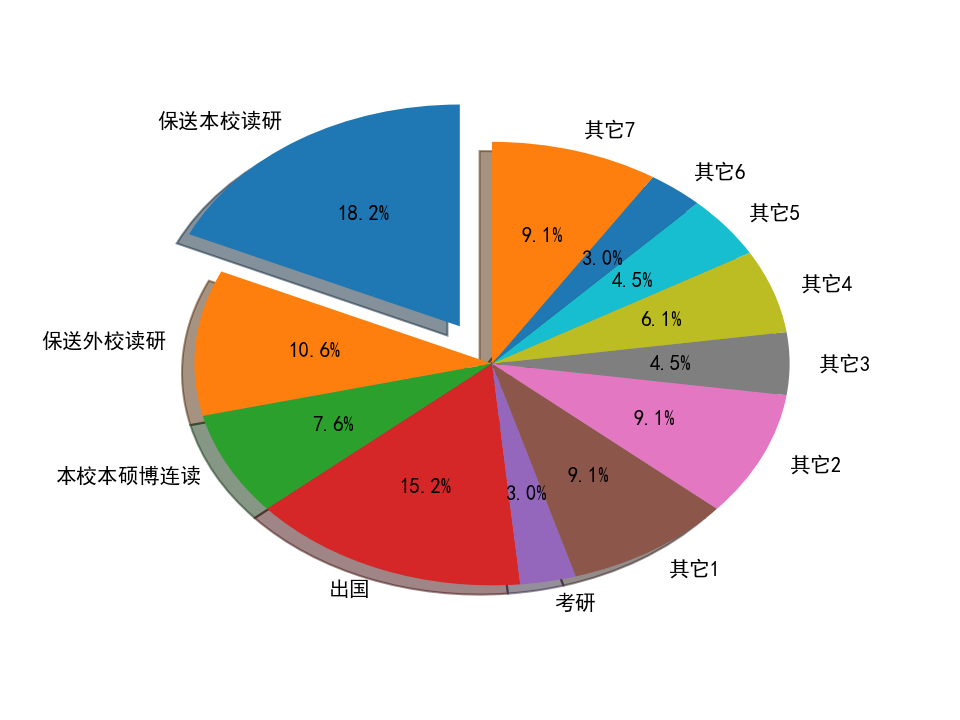

In [46]:
fig2 = plt.figure()
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
label_list = ['保送本校读研','保送外校读研', '本校本硕博连读', '出国', '考研']
max_item = 7
size = [12, 7, 5, 10, 2]
explode = [0.2, 0, 0, 0, 0]
for x in range(0, max_item):
    label_list.append('其它' + str(x + 1))
    size.append(random.randint(1,9))
    explode.append(0)
patches, texts, autotexts = plt.pie(size, explode = explode, labels = label_list, labeldistance = 1.1, autopct='%1.1f%%',shadow=True, startangle = 90, pctdistance = 0.6)
proptease = fm.FontProperties()
# proptease.set_size('large')
plt.setp(texts, fontproperties = proptease)
plt.setp(autotexts, fontproperties = proptease)
plt.show()

## 作业9
导入之前对原始数据文件的列明做了一些处理

In [5]:
college = pd.read_csv('../data/college.csv')

In [6]:
class Data:
    provinces = list(college.loc[:, '省/市'])
    college_211_num = map(int, list(college.loc[:, '211&985大学数量']))
    college_public_num = map(int, list(college.loc[:, '公办本科大学数量']))
    def values(start: int = 20, end : int = 150):
        return [random.randint(start, end) for _ in range(32)]

In [7]:
m1 = (
    Map()
    .add('211&985大学数量', [list(z) for z in zip(Data.provinces, Data.college_211_num)], 'china')
    .set_global_opts(
        title_opts=opts.TitleOpts(title="各省211&985大学数量"),
        visualmap_opts = opts.VisualMapOpts(min_ = 0, max_ = 20)
    )
    .set_series_opts(label_opts = opts.LabelOpts(is_show = True))
)
m2 = (
    Map()
    .add('公办本科大学数量', [list(z) for z in zip(Data.provinces, Data.college_public_num)], 'china')
    .set_global_opts(
        title_opts=opts.TitleOpts(title="各省公办本科大学数量"),
        visualmap_opts = opts.VisualMapOpts(min_ = 0, max_ = 50)
    )
    .set_series_opts(label_opts = opts.LabelOpts(is_show = True))
)

In [214]:
m1.render_notebook()

In [215]:
m2.render_notebook()

## 作业10
随机生成天气数据（省份：辽宁）

In [15]:
class Data:
    liaoning_city = ['沈阳市', '大连市', '鞍山市', '抚顺市', '本溪市', '丹东市', '锦州市', '营口市', '阜新市', '辽阳市', '盘锦市', '铁岭市', '朝阳市', '葫芦岛市']
    def values(start: int = 30, end : int = 40) -> list:
        return [random.randint(start, end) for _ in range(21)]

def geo_liaoning(title) -> Geo:    
    m = (
        Geo()
        .add_schema(maptype = '辽宁')
        .add(
            title, [list(z) for z in zip(Data.liaoning_city, Data.values())],
            type_ = ChartType.HEATMAP
        )
        .set_global_opts(
            visualmap_opts = opts.VisualMapOpts(max_ = 42, is_piecewise = True),
            title_opts = opts.TitleOpts(title = '辽宁省8月各地级市温度变化情况')
        )
    )
    return m

In [17]:
img_path = 'img/'
for i in range(1, 32):
    str_date = 'Aug ' + str(i)
    make_snapshot(snapshot, geo_liaoning(str_date).render(), img_path + str(i) + '.png', pixel_ratio = 3)

### 输出gif文件（见压缩文件内）

In [21]:
images = []
filenames = []
for i in range(1, 32):
    filenames.append(img_path + str(i) + '.png')
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave(img_path + 'temperature.gif', images)

## 作业11

<IPython.core.display.Javascript object>


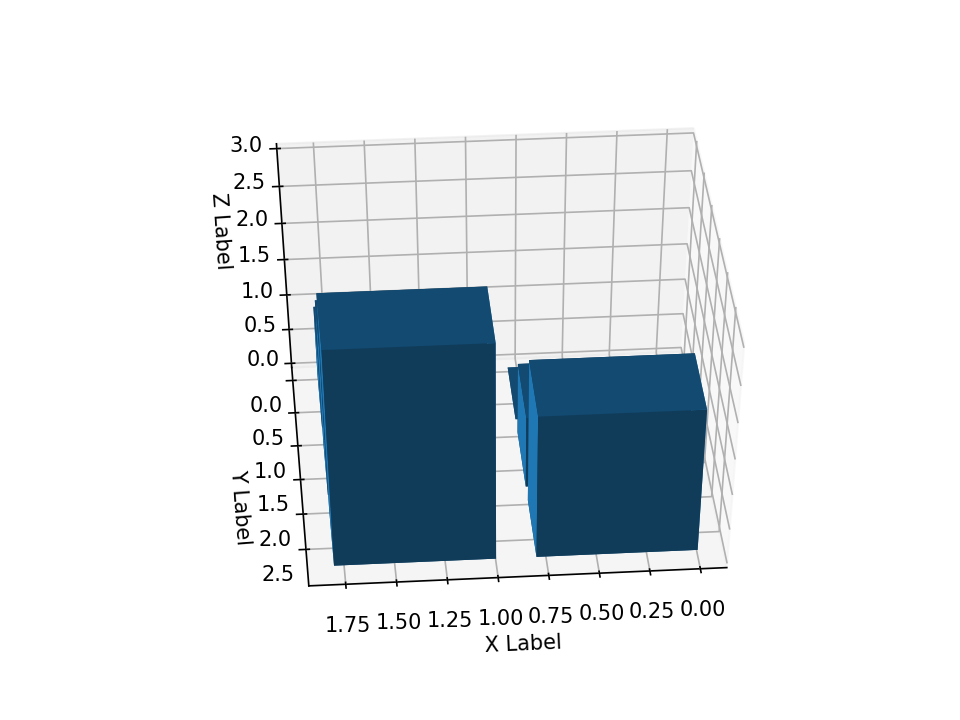

In [32]:
fig3 = plt.figure()
ax = fig3.add_subplot(1, 1, 1, projection= '3d')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

x = np.array([0, 0, 0, 1, 1, 1])
y = np.array([0, 1, 2, 0, 1, 2])
z = x + y

bottom = np.zeros_like(z)
width = depth = 0.8
ax.bar3d(x, y, bottom, width, depth, z)
plt.show()